<a href="https://colab.research.google.com/github/seungukkim/R_lecture/blob/main/day29_mi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬
- Machine Learning
  + 정형데이터
  + 사이킷런
- Deep Learning
  + 비정형데이터
  + Tensorflow(구글)
  + Pytorch(페이스북)
  + 혼공머: Tensorflow
  + 실제 상용서비스 - Tensorflow
  + R&D- Pytorch

## 생선 분류
- 도미, 곤들매기, 농어 등등
- 이 생선들을 프로그램으로 분류한다.

-30cm 이상이면 도미라고 알려줘


## 도미의 길이와 무게를 줬다.

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

##데이터 가공
- 여기서는 생략

##데이터 시각화
- 여러인사이트 확인 위해 시각화, 통계 수치 계산
- 탐색적 자료분석(EDA:Exploratory Data analysis)

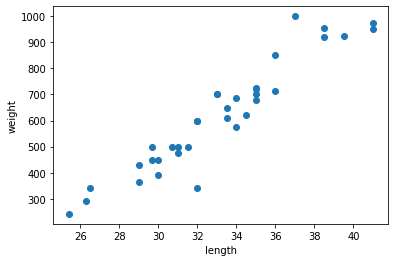

In [4]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 파이썬 시각화는 객체지향으로 한다.

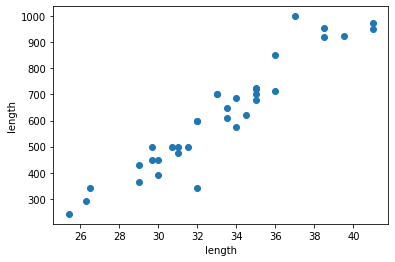

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비하기

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

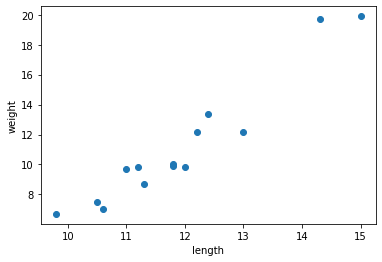

In [9]:
fig,ax = plt.subplots()

ax.scatter(smelt_length,smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

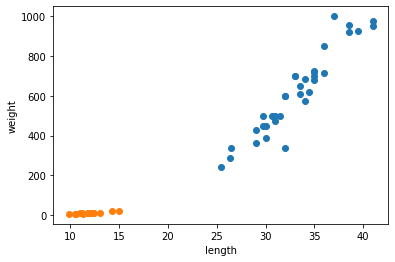

In [10]:
fig,ax = plt.subplots()
ax.scatter(bream_length,bream_weight)
ax.scatter(smelt_length,smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 두개의 리스트 합치기 

In [11]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 2차원리스트로 만든다.

In [13]:
fish_data = [[l,w]for l,w in zip(length,weight)]
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

- 라벨링을 해준다. = 지도 해준다.
=지도학습

In [14]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 모델링 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
#클래스 인스턴스화
kn=KNeighborsClassifier()

#모형 학습
kn.fit(fish_data,fish_target)


1.0

In [ ]:
# 예측 정확도
kn.score(fish_data, fish_target)

- 실제 에측을 해보자
- 새로운 물고기 도착했습니다.
  + 길이: 30, 몸무게 : 600

In [20]:
kn.predict([[30,600]])

array([1])

In [21]:
ac_length = int(input("물고기 길이를 입력하세요 ..."))
ac_weight = int(input("물고기 무게를 입력하세요 ..."))

preds = kn.predict([[ac_length,ac_weight]])

if preds ==1:
  print("도미다")
else:
  print("빙어다")

물고기 길이를 입력하세요 ...1
물고기 무게를 입력하세요 ...10
빙어다
